In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Reading in CSV file containing information obtained with US Census API.
house_valuesdf = pd.read_csv('income_vs_home_rent.csv')
house_valuesdf

,County,Year,Median Household Income,Median Home Value,Median Gross Rent
0,"Washington County, Oregon",2019,82215,386600,1359
1,"Clackamas County, Oregon",2019,80484,395100,1295
2,"Multnomah County, Oregon",2019,69176,386200,1237
3,"Clackamas County, Oregon",2020,82911,421100,1356
4,"Multnomah County, Oregon",2020,71425,410800,1309
5,"Washington County, Oregon",2020,86626,413500,1440
6,"Clackamas County, Oregon",2021,88517,452200,1447
7,"Multnomah County, Oregon",2021,76290,437600,1394
8,"Washington County, Oregon",2021,92025,439300,1541
9,"Clackamas County, Oregon",2022,95740,532200,1605


In [2]:
# Original Dataframe from CSV file contained Mean Household Income, as well as Median rent value
# This cell isolates just the County, Year, and Median Home Value columns.
housevaluecols = ['County','Year','Median Home Value']
median_homevalsdf = house_valuesdf[housevaluecols].dropna()
median_homevalsdf

,County,Year,Median Home Value
0,"Washington County, Oregon",2019,386600
1,"Clackamas County, Oregon",2019,395100
2,"Multnomah County, Oregon",2019,386200
3,"Clackamas County, Oregon",2020,421100
4,"Multnomah County, Oregon",2020,410800
5,"Washington County, Oregon",2020,413500
6,"Clackamas County, Oregon",2021,452200
7,"Multnomah County, Oregon",2021,437600
8,"Washington County, Oregon",2021,439300
9,"Clackamas County, Oregon",2022,532200


In [18]:
# Created separate dataframes to be able to plot a line for each county.
Clackamas_df= median_homevalsdf[median_homevalsdf['County'] == 'Clackamas County, Oregon']
Multnomah_df= median_homevalsdf[median_homevalsdf['County']== 'Multnomah County, Oregon']
Washington_df = median_homevalsdf[median_homevalsdf['County']== 'Washington County, Oregon']
Washington_df.head()

,County,Year,Median Home Value,YoY % Change
0,"Washington County, Oregon",2019,386600,0.000000
5,"Washington County, Oregon",2020,413500,6.958096
8,"Washington County, Oregon",2021,439300,6.239420
11,"Washington County, Oregon",2022,504300,14.796267
14,"Washington County, Oregon",2023,558500,10.747571


C:\Users\moreb\AppData\Local\Temp\ipykernel_15364\48861133.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value


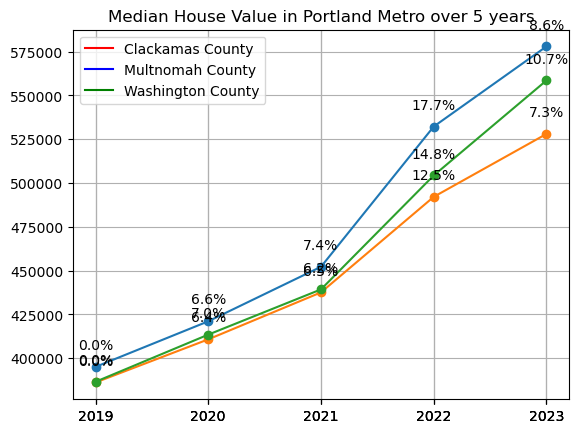

In [33]:
# Including YoY % Increase
median_homevalsdf = median_homevalsdf.sort_values(by=["County", "Year"]) # Ensure Df is sortd before calculating percent change
median_homevalsdf["YoY % Change"] = median_homevalsdf.groupby("County")["Median Home Value"].pct_change() * 100  # Establishing the YoY calculation
median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value
for County in median_homevalsdf["County"].unique():
    subset = median_homevalsdf[median_homevalsdf["County"] == County]
    plt.plot(subset["Year"], subset["Median Home Value"], marker="o", linestyle="-", label=County)
    plt.gca().set_xticks(median_homevalsdf['Year'])

    plt.grid()
    plt.title("Median House Value in Portland Metro over 5 years")
    plt.legend(handles=[Clackamas_line, Multnomah_line,Washington_line])
    plt.savefig('Median_Home_Values.png')
    # Add % change labels above each marker (Fixed: Use `pct`)
    for x, y, pct in zip(subset["Year"], subset["Median Home Value"], subset["YoY % Change"]):
        plt.text(x, y + 10000, f"{pct:.1f}%", fontsize=10, ha="center")  # Corrected to use `pct`

In [13]:
# Including YoY % Increase
median_homevalsdf = median_homevalsdf.sort_values(by=["County", "Year"]) # Ensure Df is sortd before calculating percent change
median_homevalsdf["YoY % Change"] = median_homevalsdf.groupby("County")["Median Home Value"].pct_change() * 100  # Establishing the YoY calculation
median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value
colors = {
     "Multnomah County, Oregon": "red",
     "Washington County, Oregon": "green",
     "Clackamas County, Oregon": "blue" 
}
# plt.figure(figsize=(10,8))
offests = {
    "Multnomah County, Oregon": -20000,
    "Washington County, Oregon":10000,
    "Clackamas County, Oregon": 10000
}



# plt.legend(handles=[Multnomah_line,Clackamas_line, Washington_line])
for County in median_homevalsdf["County"].unique():
    subset = median_homevalsdf[median_homevalsdf["County"] == County]
    plt.legend(handles=[Clackamas_line, Multnomah_line,Washington_line])
    # plt.plot(subset["Year"], subset["Median Home Value"], marker="o", linestyle="-", label=County,)
    plt.gca().set_xticks(median_homevalsdf['Year'])
  
    plt.grid()
    plt.title("Median House Value in Portland Metro over 5 years")
    
    plt.savefig('Median_Home_Values.png')
    # Add % change labels above each marker (Fixed: Use `pct`)
    for x, y, pct in zip(subset["Year"], subset["Median Home Value"], subset["YoY % Change"]):
        plt.text(x, y + offests[County], f"{pct:.1f}%", fontsize=10, ha="center")  # Corrected to use `pct`

C:\Users\moreb\AppData\Local\Temp\ipykernel_13172\2106583328.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value


ValueError: Image size of 569x217287894 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

C:\Users\moreb\AppData\Local\Temp\ipykernel_13172\2179105711.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value


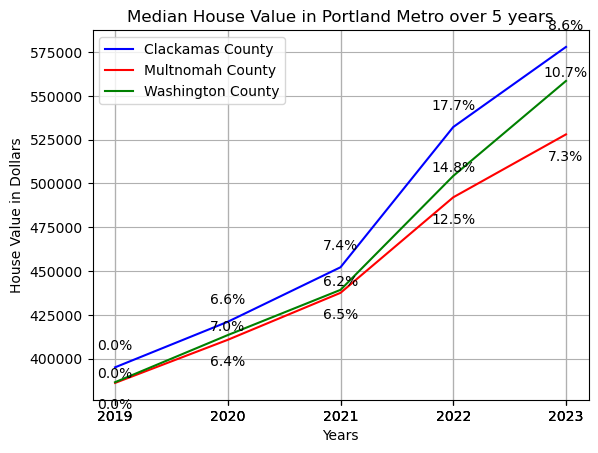

In [ ]:
# Plotting Line Graph showing Median Home Value changes in Clackamas.

Clackamas_line, = plt.plot(Clackamas_df['Year'],Clackamas_df['Median Home Value'], color = 'blue', label='Clackamas County')
Multnomah_line, = plt.plot(Multnomah_df['Year'],Multnomah_df['Median Home Value'], color='red', label='Multnomah County')
Washington_line, = plt.plot(Washington_df['Year'],Washington_df['Median Home Value'], color='green', label='Washington County')


# Ask why this isn't working, as well as how to increase the highest increment of the graph by 50k possibly
# plt.figure(figsize=(10,8))


# Including YoY % Increase
median_homevalsdf = median_homevalsdf.sort_values(by=["County", "Year"]) # Ensure Df is sortd before calculating percent change
median_homevalsdf["YoY % Change"] = median_homevalsdf.groupby("County")["Median Home Value"].pct_change() * 100  # Establishing the YoY calculation
median_homevalsdf["YoY % Change"].fillna(0, inplace=True)  # Dropping NaN value
# 
offests = {
    "Multnomah County, Oregon": -15000,
    "Washington County, Oregon":2500,
    "Clackamas County, Oregon": 10000
}
for County in median_homevalsdf["County"].unique():
    subset = median_homevalsdf[median_homevalsdf["County"] == County]
    plt.gca().set_xticks(median_homevalsdf['Year'])
    plt.grid()
    # Add % change labels above each marker (Fixed: Use `pct`)
    for x, y, pct in zip(subset["Year"], subset["Median Home Value"], subset["YoY % Change"]):
        plt.text(x, y + offests[County], f"{pct:.1f}%", fontsize=10, ha="center")  # Corrected to use `pct`
# Removing decimal places from xticks so they increment by 1 each year.
plt.xlabel("Years")
plt.ylabel("House Value in Dollars")
plt.gca().set_xticks(median_homevalsdf['Year'])

plt.grid(True)
plt.title("Median House Value in Portland Metro over 5 years")
plt.legend(handles=[Clackamas_line, Multnomah_line,Washington_line])
plt.savefig('Median_Home_Values.png')
# plt.show()

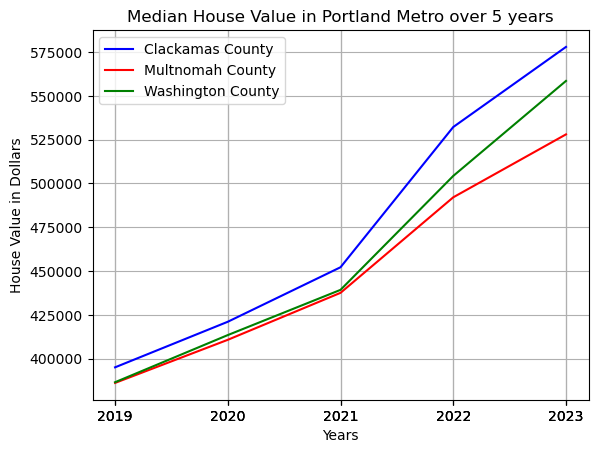

In [ ]:
# Plotting Line Graph showing Median Home Value changes in Clackamas.

Clackamas_line, = plt.plot(Clackamas_df['Year'],Clackamas_df['Median Home Value'], color = 'blue', label='Clackamas County')
Multnomah_line, = plt.plot(Multnomah_df['Year'],Multnomah_df['Median Home Value'], color='red', label='Multnomah County')
Washington_line, = plt.plot(Washington_df['Year'],Washington_df['Median Home Value'], color='green', label='Washington County')




plt.xlabel("Years")
plt.ylabel("House Value in Dollars")

# Removing decimal places from xticks so they increment by 1 each year.
plt.gca().set_xticks(median_homevalsdf['Year'])

plt.grid()
plt.title("Median House Value in Portland Metro over 5 years")
plt.legend(handles=[Clackamas_line, Multnomah_line,Washington_line])
plt.savefig('Median_Home_Values.png')
# plt.show()
